In [51]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance
from sklearn.metrics import classification_report,confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline

writing = pd.read_csv('letter-recognition.data')

writing

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [43]:
x = writing.drop('T', axis = 1)
y = writing['T']


In [44]:
label_encoder=LabelEncoder()
label_encoder.fit_transform(y)
y=label_encoder.transform(y)


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [46]:
params = {'max_depth' : 5,
         'eta' : 0.1, 
         'objective' : 'multi:softmax',
         'eval_metric' : 'error',
         'early_stoppings' : 10 ,
          'num_classes': 26
         }



In [47]:
xgb_model = xgb.XGBClassifier(params)


xgb_model.fit(x_train, y_train)  
print(xgb_model.score(x_test,y_test))

C:\Users\haeun\anaconda3\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


0.96125


C:\Users\haeun\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


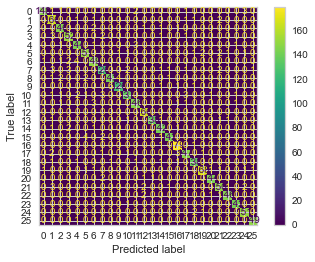

In [69]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_model, x_test, y_test)
plt.show()

In [49]:
print(classification_report(y_test,xgb_prediction))

              precision    recall  f1-score   support

           0       0.03      0.03      0.03       144
           1       0.03      0.03      0.03       146
           2       0.08      0.08      0.08       157
           3       0.07      0.07      0.07       178
           4       0.02      0.02      0.02       154
           5       0.03      0.03      0.03       144
           6       0.03      0.03      0.03       160
           7       0.05      0.05      0.05       134
           8       0.03      0.03      0.03       155
           9       0.03      0.03      0.03       122
          10       0.04      0.04      0.04       140
          11       0.05      0.05      0.05       157
          12       0.04      0.04      0.04       177
          13       0.04      0.04      0.04       166
          14       0.02      0.02      0.02       143
          15       0.04      0.03      0.03       163
          16       0.05      0.04      0.04       166
          17       0.05    

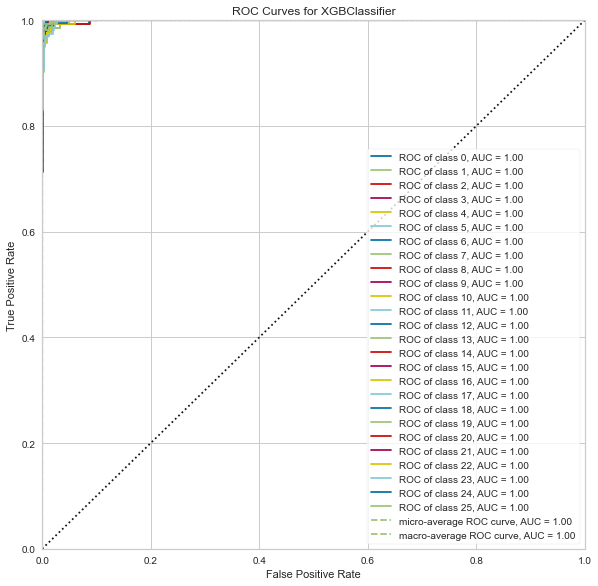

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [50]:
class_list=np.unique(y)
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(xgb_model, classes=class_list,size=(700,700))
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)        
visualizer.show()